In [ ]:
import pandas as pd
import numpy as np

In [ ]:
airfoil = pd.read_csv(r"C:\Users\Punam\Downloads\airfoil_self_noise (5).dat", sep="\t", header=None)

In [ ]:
airfoil.head(3)
print("hello")

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
airfoil.columns=["Frequency", "Angle of attack", "chord length", "Free stream velocity", "Sunction side", "pressure level"]

In [ ]:
# airfoil.

,Frequency,Angle of attack,chord length,Free stream velocity,Sunction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
airfoil.isnull().sum()

Frequency               0
Angle of attack         0
chord length            0
Free stream velocity    0
Sunction side           0
pressure level          0
dtype: int64

In [7]:
x=airfoil.iloc[:, :-1]
y=airfoil.iloc[:,-1]

In [8]:
x

,Frequency,Angle of attack,chord length,Free stream velocity,Sunction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [9]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: pressure level, Length: 1503, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.10, random_state=42)

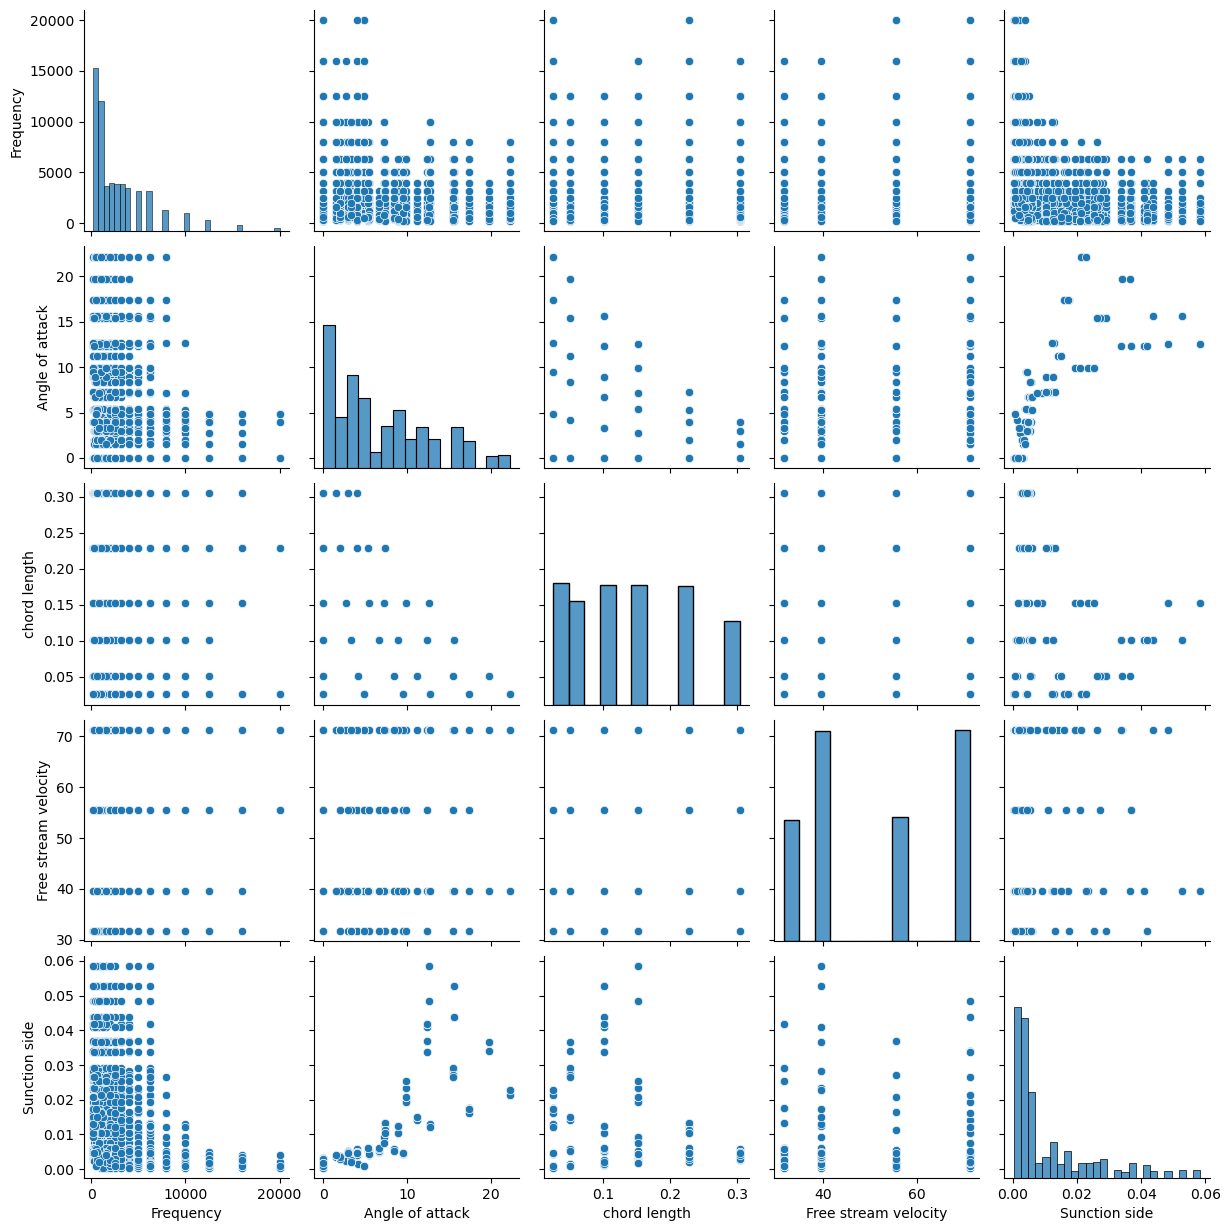

In [12]:
import seaborn as sns
sns.pairplot(x_train)

In [13]:
#linear regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-23.496301881878626


In [14]:
#Ridge regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5, 10, 20, 30,35,40,45,50,45, 100]}
ridge_regressor=GridSearchCV(ridge, parameters,scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(x_train, y_train)
print(ridge_regressor.best_score_)

-23.49549496453199


In [16]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1,5, 10, 20, 30,35,40,45,50,45, 100, 200, 300]}
lasso_regressor=GridSearchCV(lasso, parameters,scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(x_train, y_train)
print(lasso_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+04, tolerance: 5.009e+00
  model = cd_fast.enet_coordinate_descent(


-23.496301850235227


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

random_forest_regressor=RandomForestRegressor()
mse=cross_val_score(random_forest_regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


-3.380577418627946


In [18]:
lin_regressor.fit(x_train, y_train)
lasso_regressor.fit(x_train, y_train)
ridge_regressor.fit(x_train, y_train)
random_forest_regressor.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+04, tolerance: 5.009e+00
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor()

In [19]:
prediction_linear = lin_regressor.predict(x_test)
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)
prediction_random=random_forest_regressor.predict(x_test)

In [22]:
sns.distplot(y_test-prediction_linear)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

In [ ]:
lin_regressor.score(x_test, y_test)

In [ ]:
lasso_regressor.score(x_test, y_test)

In [ ]:
ridge_regressor.score(x_test, y_test)

In [ ]:
random_forest_regressor.score(x_test, y_test)